# Extraction de Keywords

## Imports

In [74]:
import os
import yake
import requests
import collections
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import sys
from nltk.corpus import stopwords
from IPython.display import Image
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from collections import Counter
from wordcloud import WordCloud
from collections import defaultdict
from spacy.lang.fr.examples import sentences
from bs4 import BeautifulSoup
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer



In [75]:
nltk.download('stopwords')
!python -m spacy download fr_core_news_md
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


^C


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Extraire les mots clés d'un document avec Yake

In [12]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=1000)
kw_extractor

In [13]:
# Lister les Fichiers
data_path = "../../data/txt/"         
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [ ]:
# Imprimer le nombre de fichiers identifiés
len(files)

1001

In [ ]:
files[:1000]

['BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt',
 'BE-KBR00_15463334_19611101_32_00_00_0_01_0035_29133524.txt',
 'BE-KBR00_15463334_19660101_49_00_00_0_01_0074_29142174.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0016_29128000.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0023_29128007.txt',
 'BE-KBR00_15463334_19700401_65_00_00_0_01_0051_29151819.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0017_29572262.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0019_29572264.txt',
 'BE-KBR00_15463334_19740701_83_00_00_0_01_0023_29580695.txt',
 'BE-KBR00_15463334_19781001_99_00_00_0_01_0039_29589982.txt',
 'BE-KBR00_15463334_19791101_103_00_00_0_01_0031_29592394.txt',
 'BE-KBR00_15463334_19820601_111_00_00_0_01_0035_29684278.txt',
 'BE-KBR00_15463334_19870601_127_00_00_0_01_0009_29693273.txt',
 'BE-KBR00_15463334_19871201_128_00_00_0_01_0047_29695113.txt',
 'KB_JB1051_1921-10-22_01-00004.txt',
 'KB_JB1051_1922-03-04_01-00004.txt',
 'KB_JB1051_1922-04-29_01-00004.txt',


In [ ]:
# Choisir un fichier
this_file = files[0]
this_file

'BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt'

In [ ]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"U.R.S.S. LES JOURNALISTES. RUSSES PREPARENT UNE REVOLUTION DE LA PRESSE OFFICIELLE Les rédacteurs en chef des vingt-trois principaux journaux soviétiques ont été convoqués à Moscou la semaine dernière pour participer à une confé rence sur l'amélioration de la presse en U.R.S.S. L'ordre du jour de la conférence était secret et les journaux n'ont publié aucun compte rendu de ses travaux. L’importance de cette réunion était cependant attestée par la présence de Mme Fourtseva, membre du Praesi dium "

In [ ]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('PRESSE', 0.024222911366124002),
 ('journaux', 0.048466587604846074),
 ('presse soviétique', 0.049043047425175505),
 ('PRESSE INDIENNE', 0.06301346187119425),
 ('PRESSE OFFICIELLE', 0.06635017550139964),
 ('PREPARENT UNE REVOLUTION', 0.07064427654248945),
 ('presse soviétique actuelle', 0.092792736075077),
 ('RUSSES', 0.09717784917912838),
 ('principaux journaux soviétiques', 0.10245433883722045),
 ('rédacteurs en chef', 0.1079571191952993),
 ('RUSSES PREPARENT', 0.11092456526686227),
 ('Mme Fourtseva', 0.11526194171429652),
 ('Baulin', 0.12018922527534606),
 ('articles', 0.13363210502971745),
 ('chef', 0.13812884838907058),
 ('articles de propagande', 0.13951003955336688),
 ('journaux soviétiques', 0.14299826436244917),
 ("PRESSE INDIENNE L'Office", 0.14972660226786894),
 ('journaux russes', 0.15190997668400977),
 ('Moscou', 0.15980231490360491),
 ('quotidiens', 0.1664857984594843),
 ('vingt-trois principaux journaux', 0.17110251425180872),
 ('périodiques', 0.17610894164166838),
 ('

In [19]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['presse soviétique',
 'PRESSE INDIENNE',
 'PRESSE OFFICIELLE',
 'RUSSES PREPARENT',
 'Mme Fourtseva',
 'journaux soviétiques',
 'journaux russes',
 'presse modernes',
 "presse n'est",
 'Presse manquait',
 'principaux journaux',
 "journaux n'ont",
 'Press Registrar',
 'Praesi dium',
 'vingt-trois rédacteurs',
 'villes russes',
 'Alexandre Baulin',
 'journaux occidental',
 'soviétique actuelle',
 'semaine dernière',
 'dirigeants russes',
 'vingt-trois principaux',
 'propagande publiés',
 'grands quotidiens',
 'chef réunis',
 "n'ont publié",
 'compte rendu',
 "INDIENNE L'Office",
 'grand nombre',
 'grandes villes',
 'nouveaux périodiques',
 'périodiques indiens',
 'communiqués officiels',
 'officiels qu’ils',
 'théori cien',
 'journal officiel',
 'grande place',
 'tirage total',
 'sévèrement attaqué',
 'point spécialisés',
 'qu’ils finissent',
 'ressembler davantage',
 'bulletins ministériels',
 "ministériels qu'à",
 'fois pompeux',
 'simples reproductions',
 "rabâchent d'ailleurs",
 'vé

In [ ]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt mentions these keywords: presse soviétique, PRESSE INDIENNE, PRESSE OFFICIELLE, RUSSES PREPARENT, Mme Fourtseva, journaux soviétiques, journaux russes, presse modernes, presse n'est, Presse manquait, principaux journaux, journaux n'ont, Press Registrar, Praesi dium, vingt-trois rédacteurs, villes russes, Alexandre Baulin, journaux occidental, soviétique actuelle, semaine dernière, dirigeants russes, vingt-trois principaux, propagande publiés, grands quotidiens, chef réunis, n'ont publié, compte rendu, INDIENNE L'Office, grand nombre, grandes villes, nouveaux périodiques, périodiques indiens, communiqués officiels, officiels qu’ils, théori cien, journal officiel, grande place, tirage total, sévèrement attaqué, point spécialisés, qu’ils finissent, ressembler davantage, bulletins ministériels, ministériels qu'à, fois pompeux, simples reproductions, rabâchent d'ailleurs, vérités élémentaires, élémentaires connues, vulgarisation sci

In [21]:
data_path = "../../data/txt/"

In [22]:
DECADE = '1915'

In [23]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [24]:
# Exemple de fichiers
files[:700]

['KB_JB421_1910-10-10_01-00001.txt',
 'KB_JB421_1911-07-31_01-00002.txt',
 'KB_JB421_1913-02-22_01-00001.txt',
 'KB_JB421_1913-05-02_01-00002.txt',
 'KB_JB421_1913-11-23_01-00001.txt',
 'KB_JB421_1914-03-14_01-00001.txt',
 'KB_JB421_1914-03-28_01-00001.txt',
 'KB_JB421_1914-05-13_01-00001.txt',
 'KB_JB421_1914-06-13_01-00001.txt',
 'KB_JB555A_1915-10-21_01-00001.txt',
 'KB_JB555A_1917-07-31_01-00002.txt',
 'KB_JB555A_1917-08-31_01-00001.txt',
 'KB_JB555A_1917-09-19_01-00002.txt',
 'KB_JB555A_1917-12-12_01-00001.txt',
 'KB_JB555A_1918-11-02_01-00001.txt',
 'KB_JB555A_1918-11-16_01-00001.txt',
 'KB_JB555_1910-10-09_01-00001.txt',
 'KB_JB555_1910-10-12_01-00004.txt',
 'KB_JB555_1911-04-22_01-00001.txt',
 'KB_JB555_1911-10-30_01-00001.txt',
 'KB_JB555_1911-11-17_01-00001.txt',
 'KB_JB555_1911-12-02_01-00001.txt',
 'KB_JB555_1911-12-05_01-00001.txt',
 'KB_JB555_1911-12-07_01-00004.txt',
 'KB_JB555_1912-01-16_01-00001.txt',
 'KB_JB555_1912-01-21_01-00004.txt',
 'KB_JB555_1912-01-30_01-00004.

In [ ]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [26]:
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [32]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [34]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\acer\Desktop\tac\tac\.env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
tfidf_array = tfidf_vectors.toarray()

In [36]:
N_CLUSTERS = 5

In [37]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [38]:
clusters = km_model.fit_predict(tfidf_vectors)

In [39]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [40]:
pprint(dict(clustering))

{0: ['KB_JB555A_1915-10-21_01-00001.txt',
     'KB_JB555A_1917-08-31_01-00001.txt',
     'KB_JB555A_1917-09-19_01-00002.txt',
     'KB_JB555A_1917-12-12_01-00001.txt',
     'KB_JB555A_1918-11-02_01-00001.txt',
     'KB_JB555A_1918-11-16_01-00001.txt',
     'KB_JB729_1914-08-13_01-00003.txt',
     'KB_JB729_1916-02-16_01-00002.txt',
     'KB_JB729_1916-02-25_01-00001.txt',
     'KB_JB729_1916-03-23_01-00002.txt',
     'KB_JB729_1916-08-30_01-00002.txt',
     'KB_JB729_1917-03-18_01-00003.txt',
     'KB_JB729_1917-03-19_01-00001.txt',
     'KB_JB729_1917-03-19_01-00002.txt',
     'KB_JB729_1917-03-20_01-00003.txt',
     'KB_JB729_1917-03-21_01-00002.txt',
     'KB_JB729_1917-03-22_01-00003.txt',
     'KB_JB729_1917-03-25_01-00003.txt',
     'KB_JB729_1917-03-27_01-00003.txt',
     'KB_JB729_1917-03-29_01-00003.txt',
     'KB_JB729_1917-03-31_01-00003.txt',
     'KB_JB729_1917-04-19_01-00003.txt',
     'KB_JB729_1917-05-12_01-00003.txt',
     'KB_JB729_1917-07-07_01-00002.txt',
     'KB_J

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [42]:
reduced_vectors[:500]

array([[-7.86024052e-02,  8.55471999e-02],
       [-6.71028205e-02, -1.10343164e-01],
       [ 1.30267465e-02,  1.43854065e-01],
       [-1.11710937e-01, -2.52522211e-02],
       [-7.39480128e-02,  1.40689531e-03],
       [-8.11722956e-03,  7.69441625e-02],
       [-2.50846433e-02, -1.15906784e-02],
       [-3.78286002e-02, -5.59280393e-03],
       [-3.92581230e-02, -2.60128012e-04],
       [ 1.82135753e-01,  3.19294559e-02],
       [ 6.80471262e-02,  4.44818456e-03],
       [ 3.11999738e-01, -1.34638144e-02],
       [ 6.29553284e-02, -2.83799026e-02],
       [ 3.44434995e-01, -1.95517037e-02],
       [ 3.72088673e-01, -5.94425229e-02],
       [ 2.32844110e-01,  1.37199282e-02],
       [-4.85929550e-02,  2.53788456e-01],
       [-1.37753994e-01,  3.28172171e-02],
       [ 7.43250132e-02,  1.89508157e-01],
       [ 1.09854661e-01,  1.88823076e-01],
       [ 6.30342519e-02,  1.86965148e-01],
       [ 6.03410333e-02,  2.29691786e-01],
       [ 1.02817843e-01,  2.56594049e-01],
       [-3.

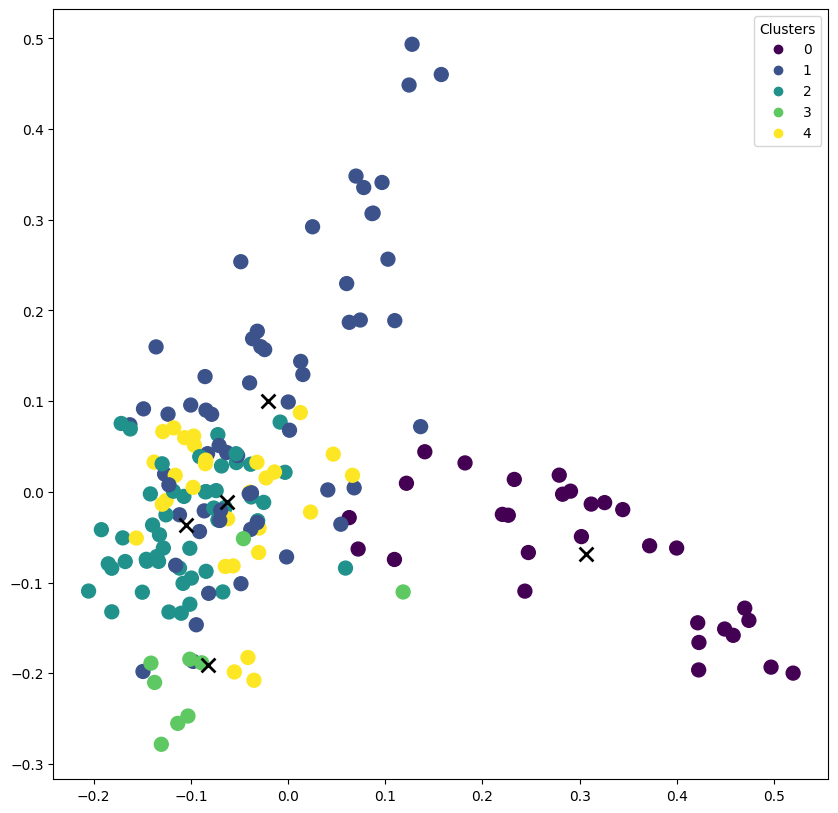

In [82]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### Stopwords

In [84]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres"]
sw = set(sw)


In [91]:
year = 1915

In [92]:
data_path = "../../data/txt/"
txt_path = 'txt'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and str(year) in f]
len(txts)

1

In [93]:
content_list = []
for txt in txts:
    with open(os.path.join(data_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [94]:
len(content_list)

1

### Afficher nuage de mots

In [108]:
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [110]:
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:700]

'SCème année. ROYAUME-UNI « ONE PENNY l ENDANCE No. 249 KIEILCSE. CONTINENT : 15 CENTIMES. (HOLLANDE : S CENTS.) ADMINIS-TRATTON ET REDACTION: TUDOR HOUSE. TUDOR ST.. LONDON. E.C. TELEPHONE: CITY 3960. BUREAU A PARIS : PLACE DE LA BOURSE. I 31 1-5 7 et 1238-75. TELEPH.: LONDRES, JEUDI 21 OCTOBRE 1915. ABONNEMENTS: , 3 MOIS, 9 SHILLINGS. . J 6 MOIS. 17 SHILLINGS. 1 1 AN, 32 SHILLINGS. . CoNSERVATiqN PAR LE PROGRÈS. SOMMAIRE. LA SITUATION : La résistance serbe. — La question des com» munica tions. — L\'attitude de la Roumanie et de la Grèce. — Les opérations en Russie. — Avance allemande vers Riga. Un anniversaire. — L\' "Indépendance Belge." Vive I\' "Indépendance Belge ["—Camille Roussel. Le sal'

In [111]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [112]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1915_clean.txt!'

In [113]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:700]

'SCÈME ANNÉE ROYAUME UNI ONE PENNY ENDANCE KIEILCSE CONTINENT CENTIMES HOLLANDE CENTS ADMINIS TRATTON REDACTION TUDOR HOUSE TUDOR LONDON TELEPHONE CITY BUREAU PARIS PLACE BOURSE TELEPH LONDRES JEUDI OCTOBRE ABONNEMENTS MOIS SHILLINGS MOIS SHILLINGS SHILLINGS CONSERVATIQN PROGRÈS SOMMAIRE SITUATION RÉSISTANCE SERBE QUESTION COM MUNICA TIONS ATTITUDE ROUMANIE GRÈCE OPÉRATIONS RUSSIE AVANCE ALLEMANDE VERS RIGA ANNIVERSAIRE INDÉPENDANCE BELGE VIVE INDÉPENDANCE BELGE CAMILLE ROUSSEL SALUT WESTMINSTER GAZETTE LETTRE GRÈCE BILLET PARISIEN JEAN BERNARD SCÈNES TYPES FRONT BELGE LOUIS PIÉRARD ECHOS ETC SITUATION JEUDI MIDI INFORMATIONS RELATIVES OPÉRATIONS SERBIE CONFUSES PARFOIS CONTRADICTOIRES LÉGATI'

In [114]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BELGE', 22), ('INDÉPENDANCE', 18), ('JOURNAL', 18), ('TROUPES', 12), ('BELGIQUE', 9), ('VERS', 7), ('COMMUNICATIONS', 7), ('PUBLICATION', 7), ('LECTEURS', 7), ('JOUR', 7)]


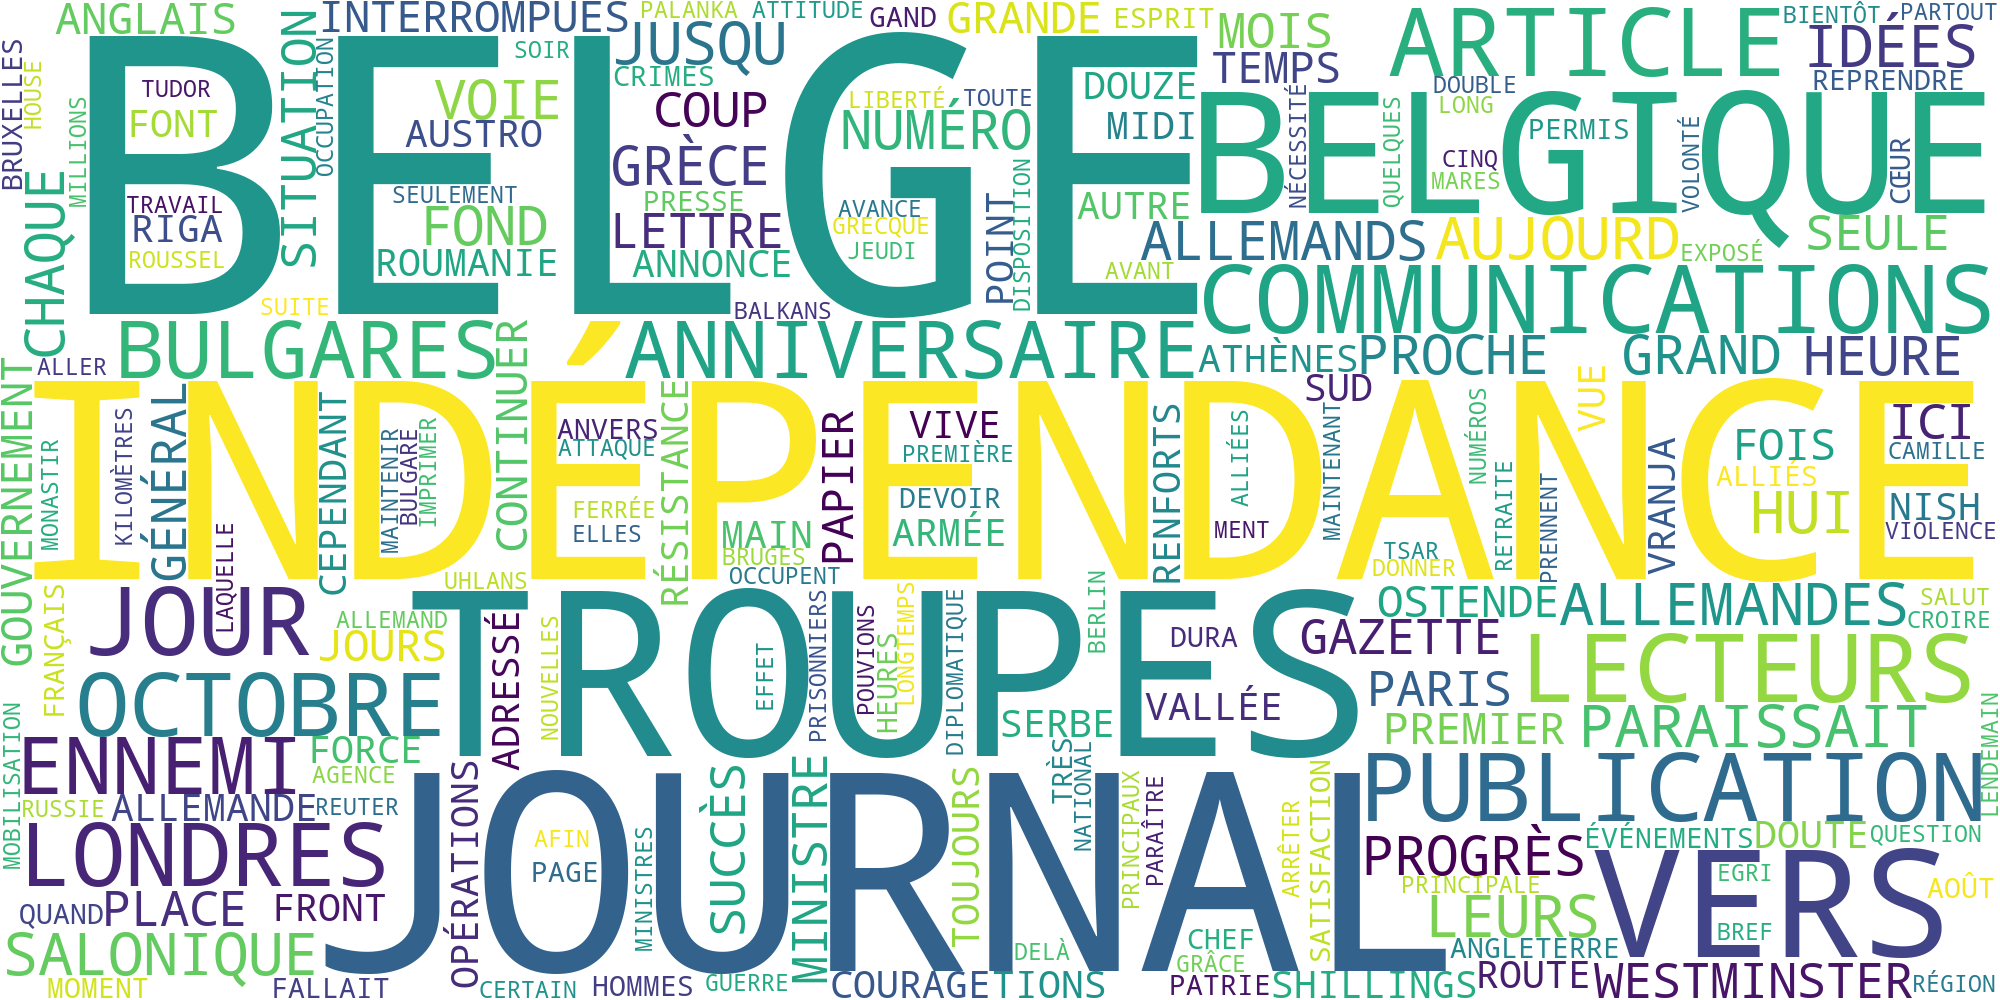

In [116]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

### Sapcy 

In [129]:
nlp = spacy.load('fr_core_news_md')

In [119]:
sentences

['Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars',
 "Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs",
 "San Francisco envisage d'interdire les robots coursiers sur les trottoirs",
 'Londres est une grande ville du Royaume-Uni',
 'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe',
 "Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon",
 "La France ne devrait pas manquer d'électricité cet été, même en cas de canicule",
 'Nouvelles attaques de Trump contre le maire de Londres',
 'Où es-tu ?',
 'Qui est le président de la France ?',
 'Où est la capitale des États-Unis ?',
 'Quand est né Barack Obama ?']

In [122]:
sent = sentences[7]
sent

'Nouvelles attaques de Trump contre le maire de Londres'

In [ ]:
doc = nlp(sent)

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
doc.to_json()

{'text': 'Nouvelles attaques de Trump contre le maire de Londres',
 'ents': [{'start': 0, 'end': 18, 'label': 'MISC'},
  {'start': 22, 'end': 27, 'label': 'PER'},
  {'start': 47, 'end': 54, 'label': 'LOC'}],
 'sents': [{'start': 0, 'end': 54}],
 'tokens': [{'id': 0,
   'start': 0,
   'end': 9,
   'tag': 'ADJ',
   'pos': 'ADJ',
   'morph': 'Gender=Fem|Number=Plur',
   'lemma': 'nouveau',
   'dep': 'amod',
   'head': 1},
  {'id': 1,
   'start': 10,
   'end': 18,
   'tag': 'NOUN',
   'pos': 'NOUN',
   'morph': 'Gender=Fem|Number=Plur',
   'lemma': 'attaque',
   'dep': 'ROOT',
   'head': 1},
  {'id': 2,
   'start': 19,
   'end': 21,
   'tag': 'ADP',
   'pos': 'ADP',
   'morph': '',
   'lemma': 'de',
   'dep': 'case',
   'head': 3},
  {'id': 3,
   'start': 22,
   'end': 27,
   'tag': 'PROPN',
   'pos': 'PROPN',
   'morph': '',
   'lemma': 'Trump',
   'dep': 'nmod',
   'head': 1},
  {'id': 4,
   'start': 28,
   'end': 34,
   'tag': 'ADP',
   'pos': 'ADP',
   'morph': '',
   'lemma': 'contre'